<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 26s 1us/step  
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

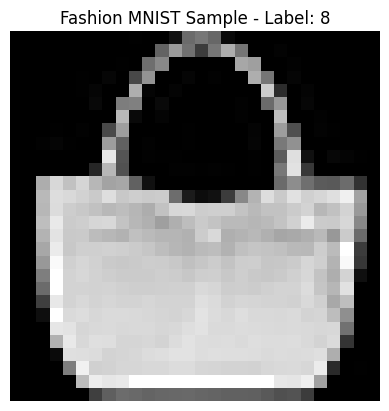

Image shape: (28, 28)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Select a random image index (you can change this number between 0 and 59999)
image_index = 100

# Display the image
plt.imshow(x_train[image_index], cmap='gray')
plt.title(f'Fashion MNIST Sample - Label: {y_train[image_index]}')
plt.axis('off')  # Hide axes
plt.show()

# Optional: Print the shape of the image to understand its dimensions
print(f"Image shape: {x_train[image_index].shape}")

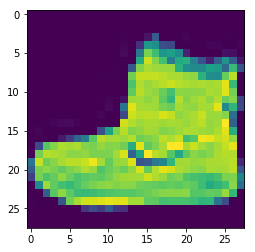

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [4]:
# Normalize the training and testing data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Optional: Verify the normalization
print(f"Original x_train min value: {x_train.min()}, max value: {x_train.max()}")
print(f"Normalized x_train min value: {x_train_normalized.min()}, max value: {x_train_normalized.max()}")
print(f"Original x_test min value: {x_test.min()}, max value: {x_test.max()}")
print(f"Normalized x_test min value: {x_test_normalized.min()}, max value: {x_test_normalized.max()}")

Original x_train min value: 0, max value: 255
Normalized x_train min value: 0.0, max value: 1.0
Original x_test min value: 0, max value: 255
Normalized x_test min value: 0.0, max value: 1.0


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [5]:
# Reshape the normalized training and testing data to include channel dimension
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], 28, 28, 1)

# Optional: Verify the new shapes
print(f"Original x_train shape: {x_train_normalized.shape}")
print(f"Reshaped x_train shape: {x_train_reshaped.shape}")
print(f"Original x_test shape: {x_test_normalized.shape}")
print(f"Reshaped x_test shape: {x_test_reshaped.shape}")

Original x_train shape: (60000, 28, 28)
Reshaped x_train shape: (60000, 28, 28, 1)
Original x_test shape: (10000, 28, 28)
Reshaped x_test shape: (10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [6]:
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Optional: Verify the conversion
print(f"Original y_train shape: {y_train.shape}")
print(f"One-hot encoded y_train shape: {y_train_encoded.shape}")
print(f"Original y_test shape: {y_test.shape}")
print(f"One-hot encoded y_test shape: {y_test_encoded.shape}")

# Optional: Show an example
print(f"\nExample - Original label: {y_train[0]}")
print(f"One-hot encoded label: {y_train_encoded[0]}")

Original y_train shape: (60000,)
One-hot encoded y_train shape: (60000, 10)
Original y_test shape: (10000,)
One-hot encoded y_test shape: (10000, 10)

Example - Original label: 9
One-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
model = Sequential([
    # 2D Convolutional Layer: 32 filters, 4x4 kernel, input shape is 28x28x1 (grayscale)
    Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28, 28, 1)),
    
    # Pooling Layer: 2x2 pool size
    MaxPooling2D(pool_size=(2,2)),
    
    # Flatten Layer: Converts 2D feature maps to 1D vector
    Flatten(),
    
    # Dense Layer: 128 neurons with ReLU activation
    Dense(128, activation='relu'),Xd
    
    # Output Dense Layer: 10 neurons (one per class) with softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Optional: Display the model summary
model.summary()

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [8]:
# Train the model
history = model.fit(
    x_train_reshaped, 
    y_train_encoded,
    epochs=8,  # You can adjust this number
    batch_size=64,  # Common batch size, feel free to modify
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1  # Shows progress bar for each epoch
)

# Optional: Print a message when training is complete
print("Training completed!")

Epoch 1/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7623 - loss: 0.6782 - val_accuracy: 0.8742 - val_loss: 0.3546
Epoch 2/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8853 - loss: 0.3196 - val_accuracy: 0.8901 - val_loss: 0.3015
Epoch 3/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9024 - loss: 0.2657 - val_accuracy: 0.8597 - val_loss: 0.3652
Epoch 4/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9125 - loss: 0.2388 - val_accuracy: 0.9049 - val_loss: 0.2676
Epoch 5/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9251 - loss: 0.2071 - val_accuracy: 0.9073 - val_loss: 0.2568
Epoch 6/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9348 - loss: 0.1822 - val_accuracy: 0.9122 - val_loss: 0.2519
Epoch 7/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9410 - loss: 0.1655 - val_accuracy: 0.9101 - val_loss: 0.2517
Epoch 8/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9435 - loss: 0.1513 - val_accuracy:

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

['loss', 'acc']

In [9]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test set
y_pred = model.predict(x_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test_encoded, axis=1)  # Convert one-hot encoded test labels back to classes

# Define class names for Fashion MNIST (for better readability)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Generate and print the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print("Classification Report for Fashion MNIST Test Set:\n")
print(report)

# Optional: Calculate and print overall accuracy separately
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_encoded, verbose=0)
print(f"\nOverall Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
Classification Report for Fashion MNIST Test Set:

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.77      0.91      0.83      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.83      0.86      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.86      0.59      0.70      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000


Overall Test Accuracy: 0.9059


             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!